<a href="https://colab.research.google.com/github/juyeon-shin/CLUB-D.N.A./blob/main/04.%20%EB%8B%A4%EB%B3%80%EB%9F%89_RNN%20%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def nmae(true, pred):
  score = np.mean((np.abs(true-pred))/true)
  return score

## 1. 데이터 셋 전처리

In [ ]:
train_mer = pd.read_csv('/content/drive/MyDrive/202110 데이콘_가스공급량 수요예측 모델개발/데이터/train_mer.csv')

train_mer['연월일'] = pd.to_datetime(train_mer['연월일'], format='%Y-%m-%d', errors='raise')
train_mer.index = train_mer['연월일']
train_mer = train_mer.drop(['연월일'],axis=1)
train_mer = train_mer.drop(['최저기온(℃)','최고기온(℃)'], axis=1)
train_mer.dtypes
train_mer

,시간,구분,year,month,day,weekday,수입금액지수,가스소비량,평균기온(℃),환율,공급량
연월일,,,,,,,,,,,
2013-01-01,1,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2497.129
2013-01-01,2,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2363.265
2013-01-01,3,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2258.505
2013-01-01,4,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2243.969
2013-01-01,5,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2344.105
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,20,6,2017,12,31,6,114.29,6569,2.1,1076.0,517.264
2017-12-31,21,6,2017,12,31,6,114.29,6569,2.1,1076.0,530.896
2017-12-31,22,6,2017,12,31,6,114.29,6569,2.1,1076.0,506.287


In [ ]:
val_mer = pd.read_csv('/content/drive/MyDrive/202110 데이콘_가스공급량 수요예측 모델개발/데이터/val_mer.csv')

val_mer['연월일'] = pd.to_datetime(val_mer['연월일'], format='%Y-%m-%d', errors='raise')
val_mer.index = val_mer['연월일']
val_mer = val_mer.drop(['연월일'],axis=1)
val_mer = val_mer.drop(['최저기온(℃)','최고기온(℃)'], axis=1)
val_mer.dtypes
val_mer

,시간,구분,year,month,day,weekday,수입금액지수,가스소비량,평균기온(℃),환율,공급량
연월일,,,,,,,,,,,
2018-01-01,1,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1765.008
2018-01-01,2,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1679.186
2018-01-01,3,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1610.885
2018-01-01,4,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1604.123
2018-01-01,5,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1711.506
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,20,6,2018,12,31,0,172.60,6381,-3.2,1120.0,681.033
2018-12-31,21,6,2018,12,31,0,172.60,6381,-3.2,1120.0,669.961
2018-12-31,22,6,2018,12,31,0,172.60,6381,-3.2,1120.0,657.941


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/깍두기와 겉절이들/가스공급량 수요 예측/데이터/same_test.csv')
test['일자'] = pd.to_datetime(test['일자'], format='%Y-%m-%d', errors='raise')
test.index= test['일자']
test = test.drop(['Unnamed: 0','일자','연월일'],axis=1)#, , '시간', '구분', '연월일', 'year', 'month', 'day','weekday', 'pred_y', 'pred_x.1', 'pred_y.1'], axis=1)
d_map = {}
for i, d in enumerate(test['구분'].unique()):
    d_map[d] = i
test['구분'] = test['구분'].map(d_map)

test

,시간,구분,year,month,day,weekday,소비량,평균기온,수입금액지수,달러환율
일자,,,,,,,,,,
2019-01-01,1,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
2019-01-01,2,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
2019-01-01,3,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
2019-01-01,4,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
2019-01-01,5,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
...,...,...,...,...,...,...,...,...,...,...
2019-03-31,20,6,2019,3,31,6,5482.130419,14.000000,192.097301,1120
2019-03-31,21,6,2019,3,31,6,5482.130419,14.000000,192.097301,1120
2019-03-31,22,6,2019,3,31,6,5482.130419,14.000000,192.097301,1120


## 다변량 RNN

In [ ]:
y = np.array([0]*test_mer.shape[0])
y = y.reshape(y.shape[0],1)
test_X = np.concatenate([test_mer, y], axis=1)
print(test_X.shape)

(15120, 14)


In [ ]:
train_mer = train_mer.values
var_mer = val_mer.values
test_mer = test_X

print(train_mer.shape, val_mer.shape, test_mer.shape)

(306768, 11) (61320, 11) (15120, 13)


In [ ]:
data = np.concatenate([train_mer, val_mer],axis=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)

In [ ]:
# train data x,y 분할
X_data = scaled[:,:-1]
y_data = scaled[:, -1]

X_train = X_data[:306768]
y_train = y_data[:306768]
X_valid = X_data[306768:-15120]
y_valid = y_data[306768:-15120]

X_valid = X_data[306768:]
y_valid = y_data[306768:]

X_test = X_data[-15120:]
y_test = y_data[-15120:]

In [ ]:
#train data, x_test data reshape
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_valid = X_valid.reshape(X_valid.shape[0],1,X_valid.shape[1])
X_test = X_test.reshape(X_test.shape[0],1, X_test.shape[1])

#X_test = test_X.reshape(test_X.shape[0],1, test_X.shape[1])

In [ ]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_valid.shape : ', X_valid.shape)
print('y_valid.shape : ', y_valid.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

#print('X_test.shape : ', test_X.shape)
#print('y_test.shape : ', test_y.shape)

X_train.shape :  (306768, 1, 10)
y_train.shape :  (306768,)
X_valid.shape :  (61320, 1, 10)
y_valid.shape :  (61320,)
X_test.shape :  (15120, 1, 10)
y_test.shape :  (15120,)


In [ ]:
#다변량 RNN

import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=(X_train.shape[1], X_train.shape[2]))
])

model.compile(loss="mse", optimizer='SGD')
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

model.summary()

Epoch 1/20
9587/9587 [==============================] - 19s 2ms/step - loss: 0.0089 - val_loss: 0.0065
Epoch 2/20
9587/9587 [==============================] - 17s 2ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 3/20
9587/9587 [==============================] - 17s 2ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 4/20
9587/9587 [==============================] - 17s 2ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 5/20
9587/9587 [==============================] - 17s 2ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 6/20
9587/9587 [==============================] - 18s 2ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 7/20
9587/9587 [==============================] - 17s 2ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 8/20
9587/9587 [==============================] - 17s 2ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 9/20
9587/9587 [==============================] - 17s 2ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 10/20
9587/9587 [==============================] - 17s 2ms/step - l

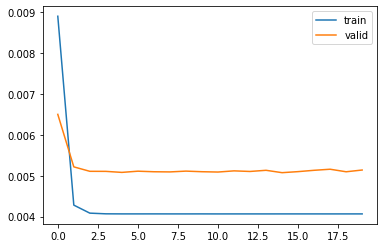

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_valid, y_valid)

1917/1917 [==============================] - 2s 1ms/step - loss: 0.0051


0.005139731802046299

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
x_train = X_train.reshape(X_train.shape[0],X_train.shape[2])
x_valid = X_valid.reshape(X_valid.shape[0],X_valid.shape[2])
x_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [ ]:
original_train = np.concatenate([x_train,y_train.reshape(-1,1)],axis=1)
print(original_train.shape)
original_valid = np.concatenate([x_valid, y_valid.reshape(-1,1)],axis=1)
print(original_valid.shape)
original_test = np.concatenate([x_test, y_test.reshape(-1,1)],axis=1)
print(original_test.shape)

original = np.concatenate([original_train,original_valid,original_test],axis=0)
print(original.shape)

y_ori = scaler.inverse_transform(original)[:,-1]
y_ori

(306768, 11)
(61320, 11)
(15120, 11)
(383208, 11)


array([2497.129, 2363.265, 2258.505, ...,  657.941,  610.953,  560.896])

In [ ]:
predict_test = np.concatenate([x_test, y_pred.reshape(-1,1)],axis=1)
print(predict_test.shape)

predict = np.concatenate([original_train,original_valid, predict_test],axis=0)
print(predict.shape)

y_pre = scaler.inverse_transform(predict)[:,-1]
y_pre

(15120, 11)
(383208, 11)


array([2497.129     , 2363.265     , 2258.505     , ..., 2226.29590443,
       2239.47200001, 2252.64239525])

In [ ]:
nmae(y_ori[-20:], y_pre[-20:])

2.510716595651124

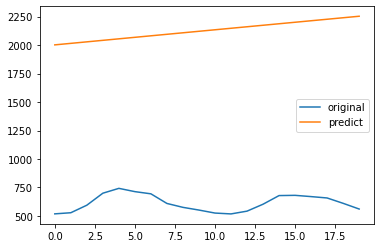

In [ ]:
plt.plot(y_ori[-20:], label='original')
plt.plot(y_pre[-20:], label='predict')
plt.legend()